In [12]:
from helpers import *

# Models
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Scalers
from sklearn.preprocessing import MinMaxScaler

# Reading Data

In [2]:
# feature extraction parameters
opt = {
        'sharpness_factor': 10,
        'bordersize': 3,
        'show_images': False,
        'is_binary': False,
        'LBP_numPoints': 8,
        'LBP_radius':1,
        'LBP_method': 'uniform',
        'HOG_width': 64,
        'HOG_height': 128,
    }

In [3]:
X, Y = read_data("data_set", windows=False)

0start ..
1start ..


In [4]:
data_train, data_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Feature Extraction

In [5]:
HOG_feature_training, HINGE_feature_training, COLD_feature_training = extract_features(imgs=data_train, options=opt)

/home/passantabdelgalil/Documents/gender-classification/cold_feature_extraction.py:127: RuntimeWarning: divide by zero encountered in log10
  rhos_log_space = np.log10(rhos)


In [6]:
HOG_feature_testing, HINGE_feature_testing, COLD_feature_testing = extract_features(imgs=data_test, options=opt)

## Scaling Features

In [7]:
HOG_scaler = MinMaxScaler()
HOG_feature_training_scaled  = HOG_scaler.fit_transform(HOG_feature_training)
HOG_feature_testing_sclaed = HOG_scaler.transform(HOG_feature_testing)

HINGE_scaler = MinMaxScaler()
HINGE_feature_training_scaled = HINGE_scaler.fit_transform(HINGE_feature_training)
HINGE_feature_testing_scaled = HINGE_scaler.transform(HINGE_feature_testing)

COLD_scaler = MinMaxScaler()
COLD_feature_training_scaled = COLD_scaler.fit_transform(COLD_feature_training)
COLD_feature_testing_scaled = COLD_scaler.transform(COLD_feature_testing)

In [8]:
all_train_features = np.concatenate((HOG_feature_training_scaled, HINGE_feature_training_scaled), axis=1)
all_train_features = np.concatenate((all_train_features, COLD_feature_training_scaled), axis=1)

all_test_features = np.concatenate((HOG_feature_testing_sclaed, HINGE_feature_testing_scaled), axis=1)
all_test_features = np.concatenate((all_test_features, COLD_feature_testing_scaled), axis=1)

# Models Comparison

In [48]:
from sklearn.metrics import fbeta_score, accuracy_score
from time import time
import matplotlib.patches as mpatches
clf_lg = LogisticRegression(random_state=42, max_iter=1000, C=10)
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf_svm = LinearSVC(C=100, random_state=42, max_iter=2000)

In [37]:
results = {}
for clf in [clf_lg, clf_gb, clf_svm]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name] = train_predict(clf, all_train_features, y_train, all_test_features, y_test)


LogisticRegression trained.
GradientBoostingClassifier trained.
LinearSVC trained.


/tmp/ipykernel_51768/1341422632.py:63: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout(pad=3.0)
/tmp/ipykernel_51768/1341422632.py:64: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


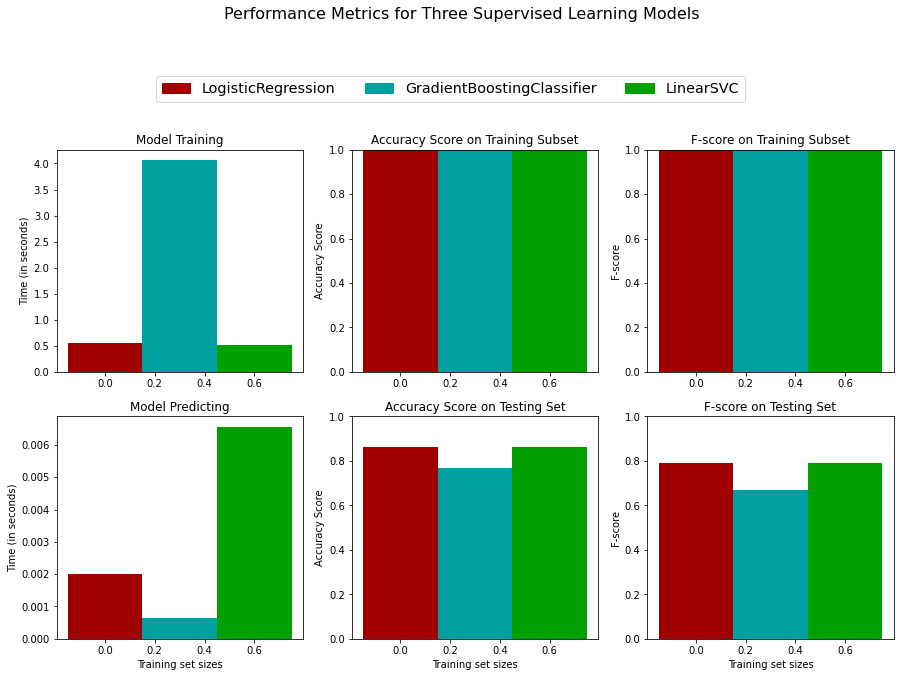

In [55]:
evaluate(results)

In [56]:
clf2 = LogisticRegression(random_state=42, max_iter=5000)
parameters2 = {
    'C': [1,10,100]
}

grid_clf2 = GridSearchCV(clf2, parameters2, scoring='f1')
grid_clf2.fit(all_train_features, y_train)
model = grid_clf2.best_estimator_

Text(0.5, 1.0, 'Testing Confusion Matrix')

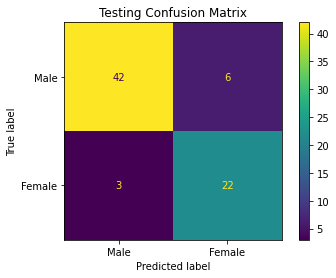

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay

ax= plt.subplot()
ConfusionMatrixDisplay.from_estimator(model, all_train_features, y_train, display_labels=['Male', 'Female'], ax=ax)

ax.set_title('Training Confusion Matrix')

ax= plt.subplot()
ConfusionMatrixDisplay.from_estimator(model, all_test_features, y_test, display_labels=['Male', 'Female'], ax=ax)

ax.set_title('Testing Confusion Matrix')

In [58]:
print(f"Training score is %0.2f"%(model.score(all_train_features, y_train) * 100))


test_pred = model.predict(all_test_features)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred == y_test)/len(y_test) * 100))

Training score is 100.00
Testing accuracy is 87.67


In [59]:
import pickle



modelname='best_logistic_model_ever.sav'
pickle.dump(model, open(modelname, 'wb'))

HOG_scalername = 'HOG_scaler.sav'
HINGE_scalername = 'HINGE_scaler.sav'
COLD_scalername = 'COLD_scaler.sav'

pickle.dump(HOG_scaler, open(HOG_scalername, 'wb'))
pickle.dump(HINGE_scaler, open(HINGE_scalername, 'wb'))
pickle.dump(COLD_scaler, open(COLD_scalername, 'wb'))

## Features Comparison based on Models Performance

## SVM

### HOG

In [9]:
svm_hog = LinearSVC(C=100, random_state=42, max_iter=2000)
svm_hog = svm_hog.fit(HOG_feature_training, y_train)
test_pred_hog_svm = svm_hog.predict(HOG_feature_testing)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_hog_svm == y_test)/len(y_test) * 100))

Testing accuracy is 73.97


In [ ]:
svm_hog = LinearSVC(C=100, random_state=42, max_iter=2000)
svm_hog = svm_hog.fit(HOG_feature_training_scaled, y_train)
test_pred_hog_svm = svm_hog.predict(HOG_feature_testing_sclaed)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_hog_svm == y_test)/len(y_test) * 100))

Testing accuracy is 76.71


### HINGE

In [24]:
svm_hinge = LinearSVC(C=100, random_state=42, max_iter=5000)
svm_hinge = svm_hinge.fit(HINGE_feature_training, y_train)
test_pred_hinge_svm = svm_hinge.predict(HINGE_feature_testing)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_hinge_svm == y_test)/len(y_test) * 100))

Testing accuracy is 71.23


In [23]:
svm_hinge = LinearSVC(C=100, random_state=42, max_iter=5000)
svm_hinge = svm_hinge.fit(HINGE_feature_training_scaled, y_train)
test_pred_hinge_svm = svm_hinge.predict(HINGE_feature_testing_scaled)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_hinge_svm == y_test)/len(y_test) * 100))

Testing accuracy is 73.97


### COLD

In [25]:
svm_cold = LinearSVC(C=80, random_state=42, max_iter=5000)
svm_cold = svm_cold.fit(COLD_feature_training_scaled, y_train)
test_pred_cold_svm = svm_cold.predict(COLD_feature_testing_scaled)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_cold_svm == y_test)/len(y_test) * 100))

Testing accuracy is 64.38


/home/passantabdelgalil/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Gradient Boosting Classifier

### HOG

In [13]:
gradient_booster_hog = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gradient_booster_hog = gradient_booster_hog.fit(HOG_feature_training, y_train)
test_pred_hog_gradient = gradient_booster_hog.predict(HOG_feature_testing)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_hog_gradient == y_test)/len(y_test) * 100))

Testing accuracy is 72.60


In [65]:
gradient_booster_hog = GradientBoostingClassifier(n_estimators=100,loss='exponential', learning_rate=1.0,max_depth=1, random_state=0)
gradient_booster_hog = gradient_booster_hog.fit(HOG_feature_training_scaled, y_train)
test_pred_hog_gradient = gradient_booster_hog.predict(HOG_feature_testing_sclaed)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_hog_gradient == y_test)/len(y_test) * 100))

Testing accuracy is 76.71


### HINGE

In [42]:
gradient_booster_hinge = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gradient_booster_hinge = gradient_booster_hinge.fit(HINGE_feature_training, y_train)
test_pred_hinge_gradient = gradient_booster_hinge.predict(HINGE_feature_testing)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_hinge_gradient == y_test)/len(y_test) * 100))

Testing accuracy is 82.19


In [55]:
gradient_booster_hinge = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
gradient_booster_hinge = gradient_booster_hinge.fit(HINGE_feature_training_scaled, y_train)
test_pred_hinge_gradient = gradient_booster_hinge.predict(HINGE_feature_testing_scaled)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_hinge_gradient == y_test)/len(y_test) * 100))

Testing accuracy is 82.19


### COLD

In [15]:
gradient_booster_cold = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gradient_booster_cold = gradient_booster_cold.fit(COLD_feature_training, y_train)
test_pred_cold_gradient = gradient_booster_cold.predict(COLD_feature_testing)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_cold_gradient == y_test)/len(y_test) * 100))

Testing accuracy is 57.53


In [28]:
gradient_booster_cold = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gradient_booster_cold = gradient_booster_cold.fit(COLD_feature_training_scaled, y_train)
test_pred_cold_gradient = gradient_booster_cold.predict(COLD_feature_testing_scaled)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_cold_gradient == y_test)/len(y_test) * 100))

Testing accuracy is 57.53


## LogisticRegression

### HOG

In [57]:
lg_hog = LogisticRegression(random_state=42, max_iter=1000, C=10)
lg_hog = lg_hog.fit(HOG_feature_training, y_train)
test_pred_hog_lg = lg_hog.predict(HOG_feature_testing)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_hog_lg == y_test)/len(y_test) * 100))

Testing accuracy is 75.34


In [56]:
lg_hog = LogisticRegression(random_state=42, max_iter=1000, C=10)
lg_hog = lg_hog.fit(HOG_feature_training_scaled, y_train)
test_pred_hog_lg = lg_hog.predict(HOG_feature_testing_sclaed)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_hog_lg == y_test)/len(y_test) * 100))

Testing accuracy is 75.34


### HINGE

In [58]:
lg_hinge = LogisticRegression(random_state=42, max_iter=1000, C=10)
lg_hinge = lg_hinge.fit(HINGE_feature_training, y_train)
test_pred_hinge_lg = lg_hinge.predict(HINGE_feature_testing)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_hinge_lg == y_test)/len(y_test) * 100))

Testing accuracy is 65.75


In [60]:
lg_hinge = LogisticRegression(random_state=42, max_iter=1000, C=10, class_weight="balanced")
lg_hinge = lg_hinge.fit(HINGE_feature_training_scaled, y_train)
test_pred_hinge_lg = lg_hinge.predict(HINGE_feature_testing_scaled)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_hinge_lg == y_test)/len(y_test) * 100))

Testing accuracy is 76.71


### COLD

In [61]:
lg_cold = LogisticRegression(random_state=42, max_iter=1000, C=10)
lg_cold = lg_cold.fit(COLD_feature_training, y_train)
test_pred_cold_lg = lg_cold.predict(COLD_feature_testing)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_cold_lg == y_test)/len(y_test) * 100))

Testing accuracy is 67.12


In [63]:
lg_cold = LogisticRegression(random_state=42, max_iter=1000, C=10, class_weight="balanced")
lg_cold = lg_cold.fit(COLD_feature_training_scaled, y_train)
test_pred_cold_lg = lg_cold.predict(COLD_feature_testing_scaled)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred_cold_lg == y_test)/len(y_test) * 100))

Testing accuracy is 68.49


# Combine Classifiers

- Logistic Regressor => HOG
- Gradient Boosting Classifier => HINGE
- SVM => COLD

In [33]:
final_train= np.concatenate((svm_cold.predict(COLD_feature_training_scaled).reshape(-1, 1), gradient_booster_hinge.predict(HINGE_feature_training_scaled).reshape(-1, 1)), axis=1)
final_train = np.concatenate((final_train, lg_hog.predict(HOG_feature_training_scaled).reshape(-1, 1)), axis=1)

final_test = np.concatenate((svm_cold.predict(COLD_feature_testing_scaled).reshape(-1, 1), gradient_booster_hinge.predict(HINGE_feature_testing_scaled).reshape(-1, 1)), axis=1)
final_test = np.concatenate((final_test, lg_hog.predict(HOG_feature_testing_sclaed).reshape(-1, 1)), axis=1)

In [36]:
final_y = y_train
clf = LogisticRegression(random_state=42, max_iter=1000, C=10, class_weight="balanced")
clf = clf.fit(final_train, final_y)
test_predicted = clf.predict(final_test)
print(f"Testing accuracy is %0.2f"%(np.sum(test_predicted == y_test)/len(y_test) * 100))

Testing accuracy is 82.19


## GridSearchCV

In [ ]:
clf = LogisticRegression(random_state=42, max_iter=5000)

parameters = {
    'C': [1,10,100]
}

grid_clf = GridSearchCV(clf2, parameters, scoring='f1')
grid_clf.fit(all_train_features, y_train)
model = grid_clf.best_estimator_

In [ ]:
print(f"Training score is %0.2f"%(grid_clf.score(all_train_features, y_train) * 100))


test_pred = grid_clf.predict(all_test_features)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred == y_test)/len(y_test) * 100))

In [11]:
model = grid_clf2.best_estimator_

preds = model.predict(all_test_features)

print(f"Testing accuracy is %0.2f"%(np.sum(preds == y_test)/len(y_test) * 100))

Testing accuracy is 86.30
